# BoomBike Sharing Assignment
-By Nivedita Bhardwaj

In this assignment we need to build a multiple linear regression model for the prediction of demand for shared bikes.

### Problem Statement:

The Company - "Boom Bike" wants to understand the factors on which the demand for the shared bikes depends. 

The company wants to know:
1. which variables are significant in predicting the demand for shared bikes.
2. how well those variables describe the bike demands.


### For this we will follow below steps to make the predictions:
1. Reading and understanding the data
2. Data Visualisation
3. Data Preparation
4. Dividing data into test and train datasets
5. Building a linear model
6. Residual Analysis of the train data
7. Making Predictions Using the Final Model
8. Model Evaluation


Data description as provided in this project:
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## 1. Reading and understanding the data

In [93]:
#importing libraries
import numpy as np
import pandas as pd

In [94]:
#reading data set
df_day = pd.read_csv("day.csv" , index_col='instant')

In [95]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [96]:
#shape of data frame
df_day.shape

(730, 15)

By going through the data description already provided to us in the project we make below observation:

1. "cnt" is our target variable i.e y axis will have this value.

2. columns 'casual' and 'registered' sum is target variable cnt , i.e casual + registered = cnt , hence we can drop these 2 columns


In [97]:
#dropping columns casual and registered 
df_day.drop(['casual' , 'registered'], axis = 1, inplace=True)

In [98]:
#checking first few rows to verify deletion of above columns
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [99]:
#understading the spread of numerical columns
df_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [100]:
#checking null values in the columns if any
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 79.8+ KB


No Null value found in any column

The column "dteday" can be dropped as the data present in it can be presented well by columns 'mnth' and 'yr'

In [101]:
#dropping column "dteday"
df_day.drop('dteday', axis = 1, inplace=True)

In [102]:
#checking first few rows to verify deletion of above column
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Before plotting the graphs, we need to understand the categorical and continuous columns

For that we will devided the columns based on unique values it posses . We know from data description that Season is having 4 unique values, month is having 12 unique values , hence these columns are categorical in nature . 

In [103]:
#getting all the column names in a list
col=df_day.columns.to_list()
print(col)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [104]:
#def col_split():
col=df_day.columns.to_list()
col_categorical = []
col_numeric = []
for col in df_day:
    if len(df_day[col].unique()) > 13:
    #         print(col, ':',len(loan_df[col].unique()))
        col_numeric.append(col)
    else:
        col_categorical.append(col)
print("Categorical Columns-",col_categorical)
print("Numeric Columns -",col_numeric)
#col_split()

Categorical Columns- ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Numeric Columns - ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [105]:
print(col_categorical)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [106]:
print(col_numeric)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


## 2. Data Visualisation

In [107]:
#importing librarires to plot graphs
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1440x864 with 0 Axes>

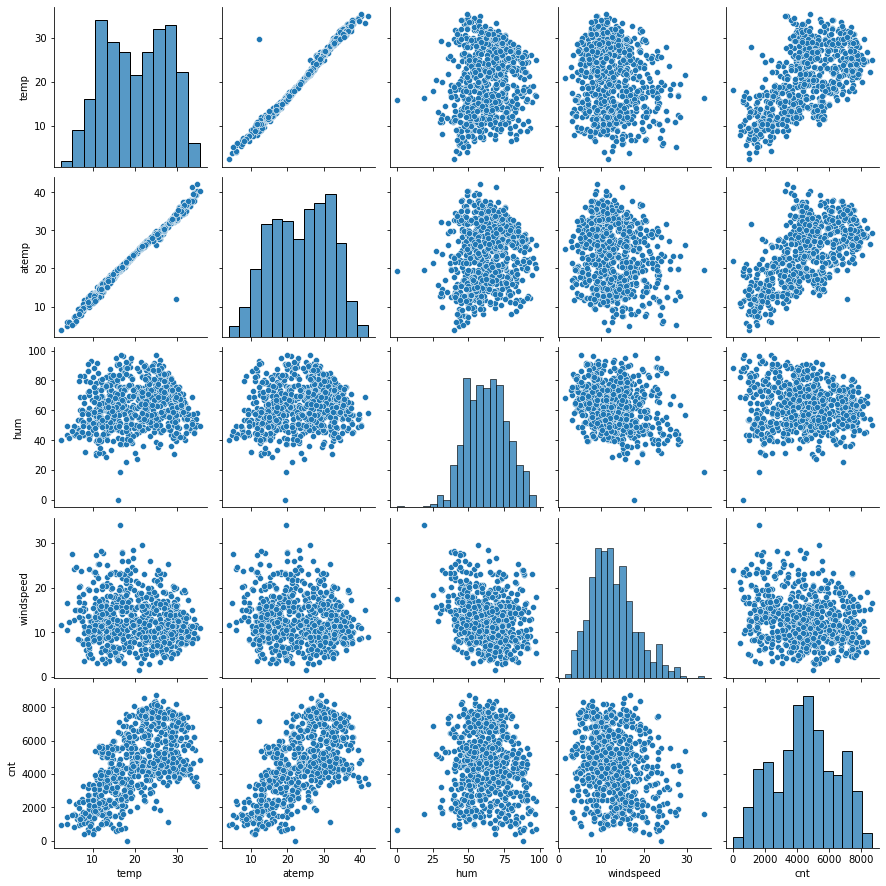

In [108]:
plt.figure(figsize=(20, 12))
sns.pairplot(df_day[col_numeric])
plt.show()

We see temp and atemp seems to be correlated. To see this further, lets plot a correlation between these two columns
    

In [109]:
#plotting correlation between temp and atemp
df_day[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


Since these 2 are highly correlated we can drop atemp fom the dataframe.

In [110]:
#dropping atemp from data frame
df_day.drop('atemp', axis = 1, inplace=True)

In [111]:
#checking first few rows to verify deletion of above column
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [112]:
print(col_numeric)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [113]:
#removing atemp from col_numeric too
col_numeric.remove('atemp')

<Figure size 1440x864 with 0 Axes>

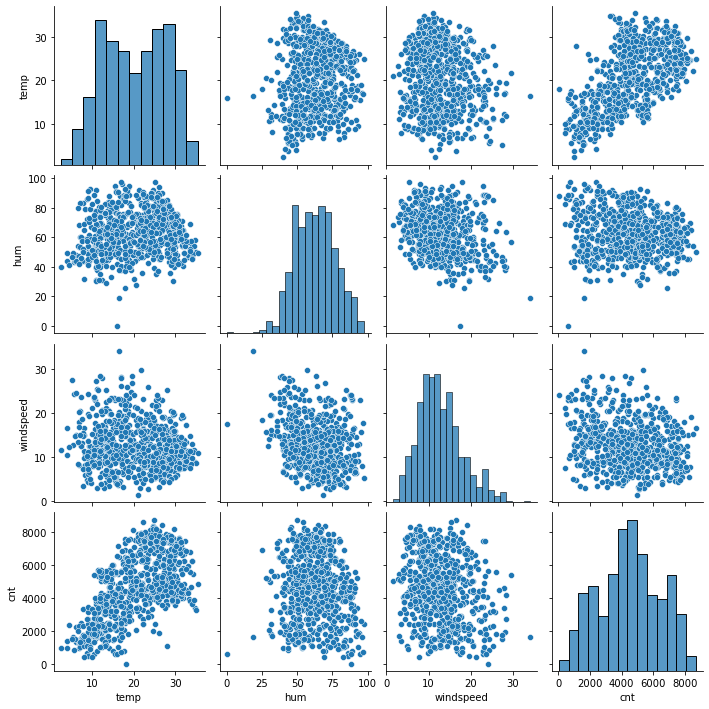

In [114]:
#plotting pair plot again
plt.figure(figsize=(20, 12))
sns.pairplot(df_day[col_numeric])
plt.show()

### Observation from pairplot: 
1. We see a linear relationship between cnt and temp. 

In [115]:
df_day[['temp','cnt']].corr()

,temp,cnt
temp,1.000000,0.627044
cnt,0.627044,1.000000


Now we will analyse the categorical variable via box plots 

In [116]:
print(col_categorical)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


We will have to map the values of these Categorical variable to the real meaning and this is derived from the data dictionary already given in this project

In [117]:
df_day['season']=df_day.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
#df_day['yr']=df_day.yr.map({0: '2018', 1: '2019'})
df_day['mnth']=df_day.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
#df_day['holiday']=df_day.holiday.map({0: 'No', 1: 'Yes'})
df_day['weekday']=df_day.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
#df_day['workingday']=df_day.workingday.map({0: 'No', 1: 'Yes'})
df_day['weathersit']=df_day.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})


df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
2,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
3,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
4,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
5,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


Plotting Box plot for all categorical variables

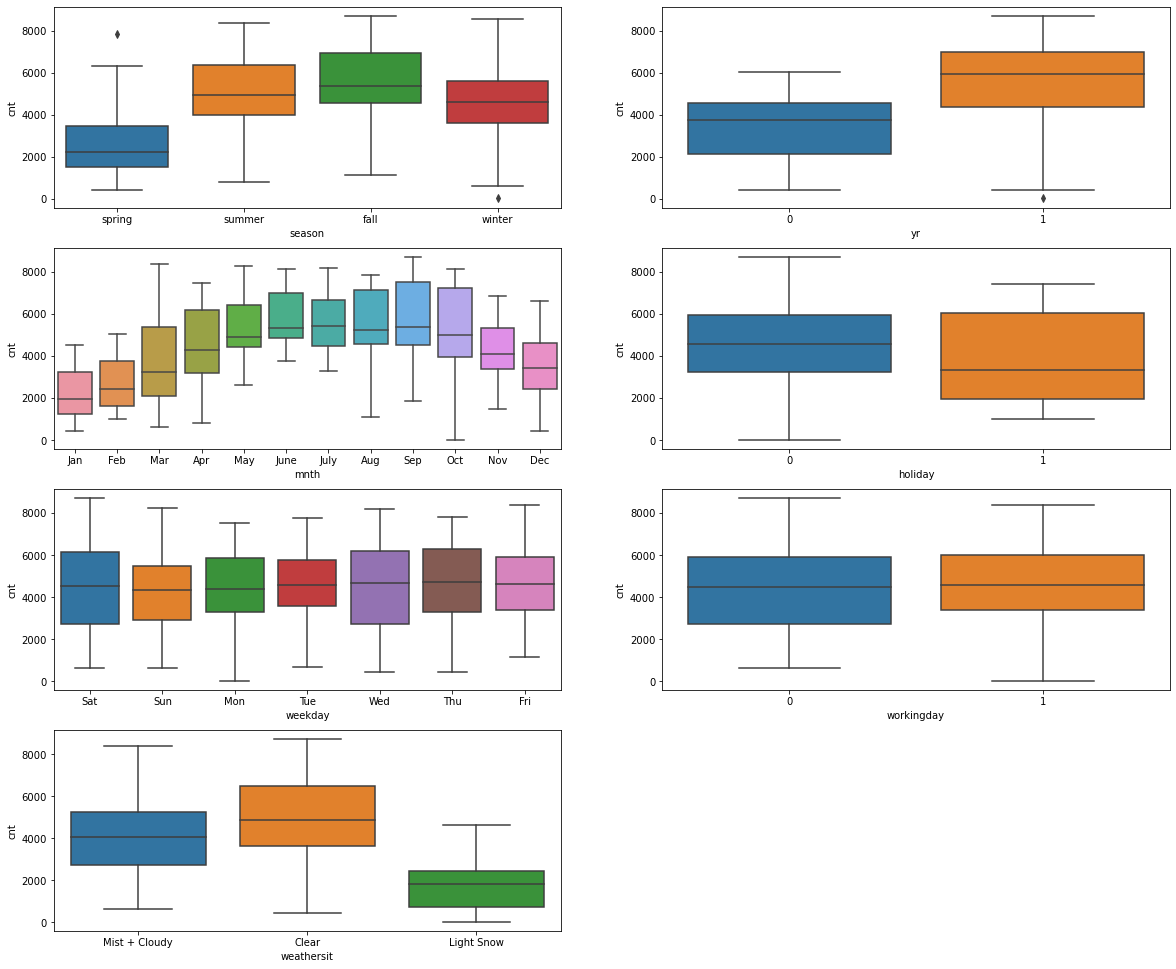

In [118]:
plt.figure(figsize=(20, 17))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_day)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_day)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day)
plt.show()

### Observations from above box plots: 

    1. Summer,Fall and Winter seasons shows increase in cnt of bikes compare to spring season
    2. In 2019 the cnt increased compared to previous year 2018
    3. April to October the cnt is higher compare to other months
    4. On a Holiday, the cnt has wider spread, means more people take bikes on holidays
    5. During light snow the bikes are booked less compare to Clear weather or Mist + Cloud weather

We can also visualise some of these categorical features parallely by using the hue argument. 

Like here we can visualise affect of holiday on bike booking across seasons

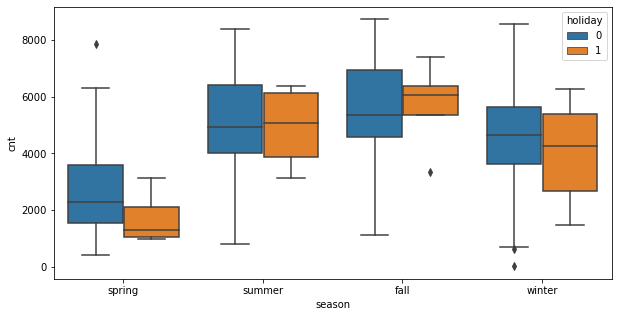

In [119]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df_day)
plt.show()

### 3. Data Preparation:


Since we transformmed all the categorical columns to take up data like "Yes" or "No" or Months to take up real Month like "Jan", "Feb" etc , so in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No' and assign dummy values to Month, Year etc.

In [120]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
2,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
3,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
4,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
5,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


Dummy Variables:
We need to add dummy variables to columns with unique values more than 2 .

We will add dummy variables to season , month , weekday and weathersit columns



In [121]:
print(col_categorical)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [122]:
season=pd.get_dummies(df_day.season,drop_first=True)
#yr=pd.get_dummies(df_day.yr,drop_first=True)
mnths=pd.get_dummies(df_day.mnth,drop_first=True)
#holiday=pd.get_dummies(df_day.holiday,drop_first=True)
weekdays=pd.get_dummies(df_day.weekday,drop_first=True)
#workingday=pd.get_dummies(df_day.workingday,drop_first=True)
weather_sit=pd.get_dummies(df_day.weathersit,drop_first=True)


In [123]:
# Add the results to the original dataframe
df_day=pd.concat([season,mnths,weekdays,weather_sit,df_day],axis=1)
df_day.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
5,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [124]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
df_day.drop(['season','mnth','weekday','weathersit',], axis = 1, inplace = True)
df_day.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
5,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [125]:
df_day.shape

(730, 29)

### 4: Dividing data into test and train datasets

In [126]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [127]:
#checking shape of train data set
df_train.shape

(510, 29)

In [128]:
#checking shape of test data set
df_test.shape

(219, 29)

### 5. Rescaling the Features

We need to rescale the variables on the same scale so that the model is easily interpretable.

We can do that by Min-Max Scaling (between 0 and 1)

We need to do this for numerical columns

In [129]:
print(col_numeric)

['temp', 'hum', 'windspeed', 'cnt']


In [130]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df_train[col_numeric] = scaler.fit_transform(df_train[col_numeric])
df_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,,,,,,,,,,
654,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
577,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
427,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
729,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
483,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


In [131]:
#checking the spread of the variables
df_train.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.158824,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.365870,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


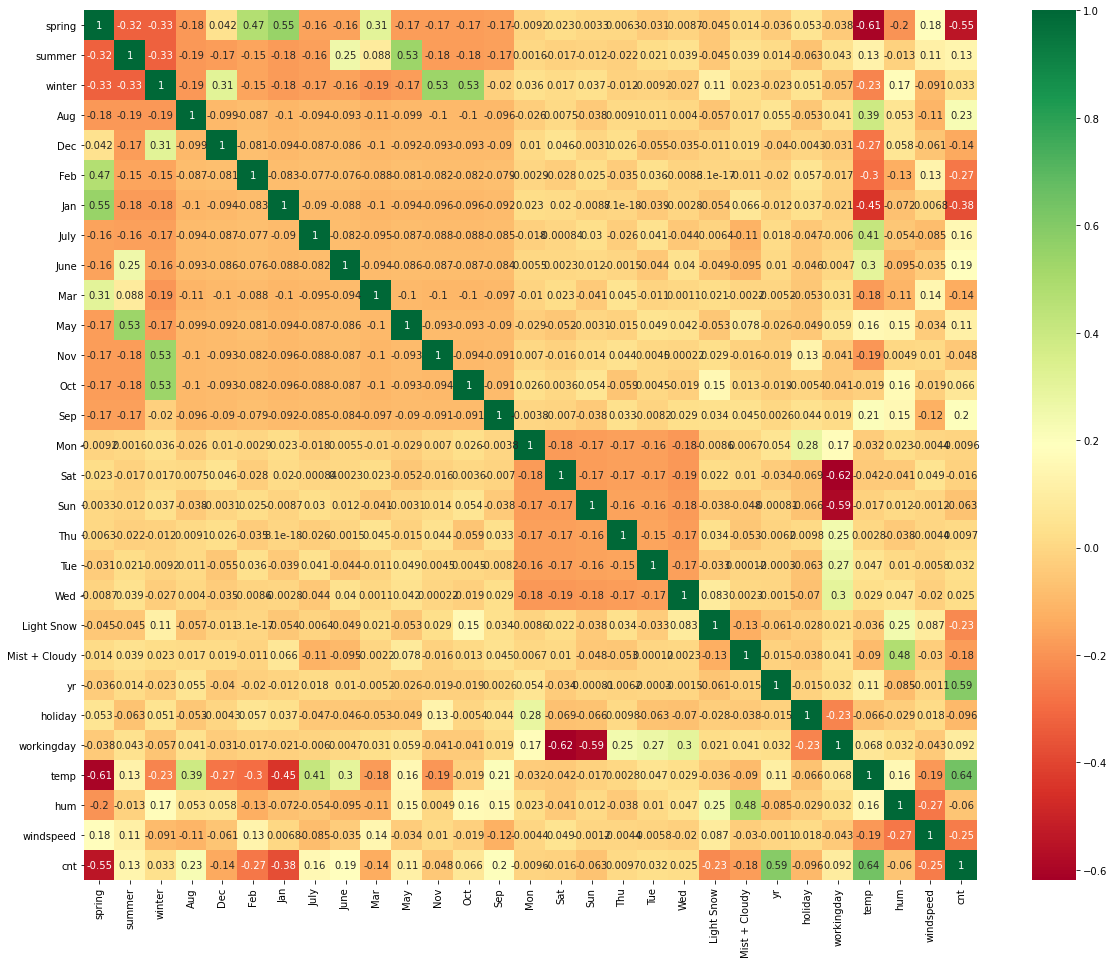

In [132]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

In the above heat map the greens show high correlation.

cnt and yr show high correlation which we had proved by above box plots
cnt and temp show high correlation for which we can make a scaatter plot.

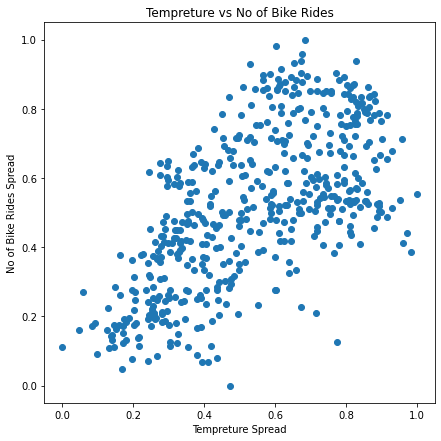

In [133]:
plt.figure(figsize=[7,7])
plt.scatter(df_train.temp, df_train.cnt)
plt.title("Tempreture vs No of Bike Rides")
plt.xlabel("Tempreture Spread")
plt.ylabel("No of Bike Rides Spread")
plt.show()

### 5. Building a Linear Model : 

We will take all the columns and build a linear model and try removing columns that are not necessary. 

In [134]:
#getting X and y dataframes seperately to plot
y_train = df_train.pop('cnt')
X_train = df_train

In [135]:
X_train.shape

(510, 28)

In [136]:
y_train.shape

(510,)

Using Recursive feature elimination(RFE) for automated Feature Selection approach

We will be using RFE to build a model as we have a lot of columns to choose from , hence this will make feature relection a bit simpler.

In [137]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [138]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [139]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [140]:
#columns which we will  consider in feature selection
col = X_train.columns[rfe.support_]
col

Index(['spring', 'summer', 'winter', 'Jan', 'July', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [141]:
#columns which we will not consider in feature selection
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [142]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [143]:
X_train_rfe.head()

,spring,summer,winter,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed
instant,,,,,,,,,,,,,,,
654,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
577,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
427,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
729,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
483,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


In [144]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [145]:
# Following a stepwise elimination
#creating the model with the list of columns selected by RFE.

#Build a linear model 1

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.31e-191
Time:                        19:06:05   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

The p-values of Jan is 0.048 we need to remove this and create model again

In [146]:
#removing Jan column
X_train_rfe = X_train_rfe.drop(['Jan'], axis=1)

In [147]:
#Build a linear model 2

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_lm).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.13e-191
Time:                        19:06:06   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2394      0.036      6.696

The p-values of holiday is 0.028 we need to remove this and create model again

In [148]:
#removing Holiday column
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

In [149]:
#Build a linear model 3

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_lm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          8.51e-192
Time:                        19:06:06   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2298      0.036      6.451

#### Checking VIF

In [150]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
#checking vif
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.13
1,spring,5.02
11,temp,3.62
3,winter,3.49
2,summer,2.61
12,hum,1.91
10,workingday,1.65
6,Sat,1.64
8,Mist + Cloudy,1.57
4,July,1.49


Removing spring due to high VIF and creating the model again

In [152]:
#removing spring column
X_train_rfe = X_train_rfe.drop(['spring'], axis=1)

In [153]:
#Build a linear model 4 after removing holiday

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_lm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.26e-191
Time:                        19:06:06   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1705      0.028      5.991

In [154]:
#checking vif
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
11,hum,1.89
9,workingday,1.65
5,Sat,1.64
10,temp,1.60
7,Mist + Cloudy,1.56
3,July,1.43
1,summer,1.33
2,winter,1.29
6,Light Snow,1.24


Removing July due to high VIF and creating the model again

In [155]:
X_train_rfe = X_train_rfe.drop(['July'], axis=1)

In [156]:
#Build a linear model 5 after removing temp

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_lm).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.89e-191
Time:                        19:06:06   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1698      0.029      5.937

In [157]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
10,hum,1.87
8,workingday,1.65
4,Sat,1.64
6,Mist + Cloudy,1.56
9,temp,1.27
2,winter,1.25
5,Light Snow,1.24
1,summer,1.19
11,windspeed,1.18


In [158]:
X_train_rfe.shape

(510, 12)

In [159]:
final_col = X_train_rfe.columns

In [160]:
final_col

Index(['const', 'summer', 'winter', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'yr', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### 6. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [161]:
y_train_price = lr5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

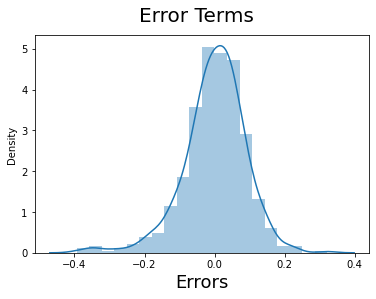

In [162]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

### 7. Making Predictions

Applying the scaling on the test sets

In [163]:
#numeric columns present in out data set
col_numeric

['temp', 'hum', 'windspeed', 'cnt']

In [164]:
df_test[col_numeric] = scaler.transform(df_test[col_numeric])
df_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,,,,,,,,,,
185,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.831783,0.657364,0.084219,0.692706
536,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.901354,0.610133,0.153728,0.712034
300,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
222,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
153,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [165]:
df_test.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.100457,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.301297,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [166]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Tue,Wed,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.164384,0.100457,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.371472,0.301297,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [167]:
final_col

Index(['const', 'summer', 'winter', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'yr', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [168]:
X_test_new = X_test[col]

In [169]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test_new)

In [170]:
X_test_m5.head()

,const,spring,summer,winter,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,yr,holiday,workingday,temp,hum,windspeed
instant,,,,,,,,,,,,,,,,
185,1.0,0,0,0,0,1,0,0,0,1,0,1,0,0.831783,0.657364,0.084219
536,1.0,0,1,0,0,0,0,0,0,0,1,0,1,0.901354,0.610133,0.153728
300,1.0,0,0,1,0,0,0,0,0,1,0,0,1,0.511964,0.837699,0.334206
222,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
153,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0.817246,0.314298,0.537414


In [171]:
X_test_m5.columns

Index(['const', 'spring', 'summer', 'winter', 'Jan', 'July', 'Sep', 'Sat',
       'Light Snow', 'Mist + Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [172]:
# Creating X_test_m5 dataframe by dropping variables from X_test_m5

X_test_m5 = X_test_m5.drop(["Jan", "holiday" , "spring","July"], axis = 1)

In [173]:
X_test_m5.head()

,const,summer,winter,Sep,Sat,Light Snow,Mist + Cloudy,yr,workingday,temp,hum,windspeed
instant,,,,,,,,,,,,
185,1.0,0,0,0,0,0,1,0,0,0.831783,0.657364,0.084219
536,1.0,1,0,0,0,0,0,1,1,0.901354,0.610133,0.153728
300,1.0,0,1,0,0,0,1,0,1,0.511964,0.837699,0.334206
222,1.0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
153,1.0,1,0,0,0,0,0,0,1,0.817246,0.314298,0.537414


In [174]:
# Making predictions using the fifth model

y_pred= lr5.predict(X_test_m5)

Finding R-squared for test model

In [175]:
#Evaluate R-square for test
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test,y_pred)

0.8058858263090349

In [176]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.80588582)*(12-1)/(12-1-1)
print(Adj_r2)

0.786474402


R-square for our model is 84.2% and R-square for test model is 80.5% which is in range of +-5% and is a good assumption

In [177]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0092


### 8. Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

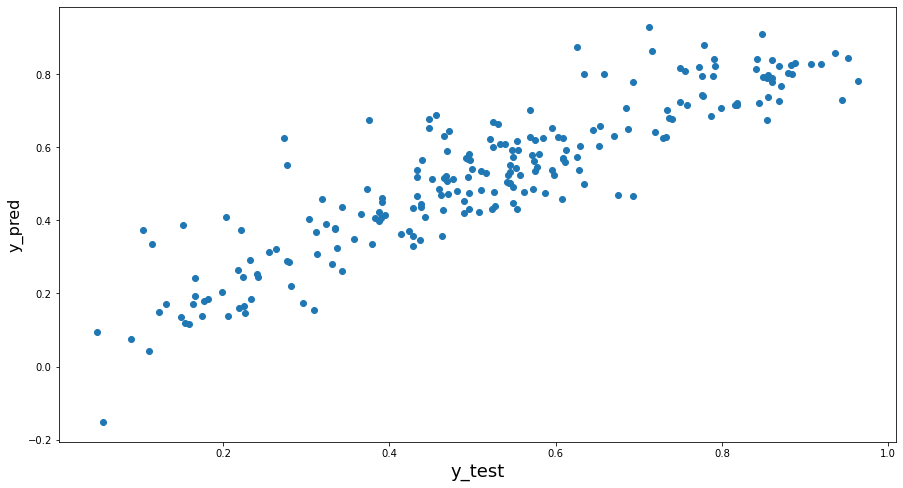

In [178]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

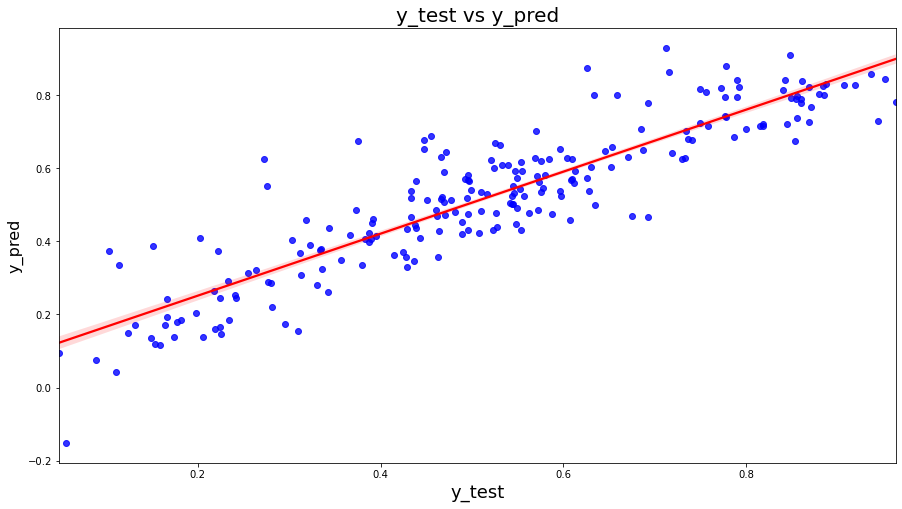

In [179]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

Getting the equation of the line:

In [180]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.89e-191
Time:                        19:06:08   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1698      0.029      5.937

So below is the line equation:

cnt = 0.0899*summer + 0.1407*winter + 0.1025*Sep + 0.0630*Sat -0.2439*Light Snow -0.0553*(Mist + Cloudy) + 0.2294*yr + 0.0536*workingday + 0.5709*temp -0.1613*hum -0.1861*windspeed  

From this we can say that the top 3 features are: 
1. Temp – (Coefficient : 0.5709)
2. Yr– (Coefficient : 0.2294)
3. Light Snow: – (Coefficient : -0.2439)


Business Goals:
- BoomBikes can focus more on Temperature
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better. 
- Can focus more on Summer & Winter season,  as they have good influence on bike rentals.
- We can see Light Snow has negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand
- We are seeing windspeed and humidity variable have got negative coefficients so we can give offers.